## 1. BUSINESS UNDERSTANDING

In [ ]:
# Importing the initial libraries needed for the project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the product data
products = pd.read_csv("products.csv")

products.head(2)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000


I want to learn more about the data which can help my analysis

In [ ]:
# Show the number of rows and columns in the 'products' DataFrame
products.shape

(7982, 6)

In [ ]:
# Show summary information about the DataFrame, including column data types and missin
products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB


In [ ]:
# Display summary statistics (like mean, min, max, and quartiles) for the numerical columns in the DataFrame
products.describe()


,Price,Av_Score
count,5816.000000,7982.000000
mean,144.776618,2.988683
std,499.223719,0.911673
min,-65.270000,1.000000
25%,40.700000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [ ]:
# Count the number of missing (null) values in each column of the DataFrame
products.isnull().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


I want to explore the other datasets before I know my next step

In [ ]:
# Reading the reviews data
reviews = pd.read_csv("reviews.csv")
reviews.head(2)

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...


In [ ]:
# Show the number of rows and columns in the 'reviews' DataFrame
reviews.shape


(39063, 4)

In [ ]:
# Show summary information about the DataFrame, including column data types and missin
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
# Display summary statistics (like mean, min, max, and quartiles) for the numerical columns in the DataFrame
reviews.describe()

,Score
count,39063.000000
mean,1.487648
std,1.400332
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [ ]:
# Count the number of missing (null) values in each column of the DataFrame
reviews.isnull().sum()

,0
Uniq_id,0
Username,0
Score,0
Review,0


In [ ]:
# Reading the users data
users = pd.read_csv("users.csv")
users.head(2)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts


In [ ]:
# Show the number of rows and columns in the 'products' DataFrame
users.shape

(5000, 3)

In [ ]:
# Show summary information about the DataFrame, including column data types and missin
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [ ]:
# Display summary statistics (like mean, min, max, and quartiles) for the numerical columns in the DataFrame
users.describe()

,Username,DOB,State
count,5000,5000,5000
unique,4999,52,57
top,dqft3311,07.08.1953,Massachusetts
freq,2,112,107


In [ ]:
# Count the number of missing (null) values in each column of the DataFrame
users.isnull().sum()

,0
Username,0
DOB,0
State,0


The products DataFrame contains 7982 rows and 6 columns. It has significant missing values in SKU (67), Description (543), and Price (2166). Notably, the Price column has an unusual minimum value of -65.27. The average score ranges from 1.0 to 5.0, with a mean of 2.99.

The reviews DataFrame contains 39063 rows and 4 columns, with no missing values. The Score column ranges from 0 to 5, with a mean of 1.49, which is considerably lower than the Av_Score observed in the products DataFrame.

The users DataFrame contains 5000 rows and 3 columns, with no missing values. The DOB column is stored as an object (string) and not a datetime. There is a duplicate username and 57 unique states, with 'Massachusetts' being the most frequent.

I want to extract the age from the date of birth

In [ ]:
users['DOB'] = pd.to_datetime(users['DOB'], format='%d.%m.%Y')
users['age'] = (pd.to_datetime('now').year - users['DOB'].dt.year)
users.head(2)

,Username,DOB,State,age
0,bkpn1412,1983-07-31,Oregon,42
1,gqjs4414,1998-07-27,Massachusetts,27


In [ ]:
# handling negative prices in price column
products["Price"] = products["Price"].abs()

In [ ]:
products.isnull().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


The price still has null values. I will replace them with the median of the prices of products that have the same SKU

In [ ]:
products['Price'] = products.groupby('SKU')['Price'].transform(lambda x: x.fillna(x.median()))

In [ ]:
products.isnull()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7977,False,False,False,False,False,False
7978,False,False,False,False,False,False
7979,False,False,False,False,False,False
7980,False,False,False,True,True,False


In [ ]:
products.isnull().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,1955
Av_Score,0


In [ ]:
products.isnull().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,1955
Av_Score,0


In [ ]:
products['Price'] = products['Price'].fillna(products['Price'].median())

In [ ]:
products.dropna(subset=['SKU'], inplace=True)

Now that the Data is prepared, I want to start making the visualisations to gather insights. the first I would do is to look for the top 15 products bought in JCPenney

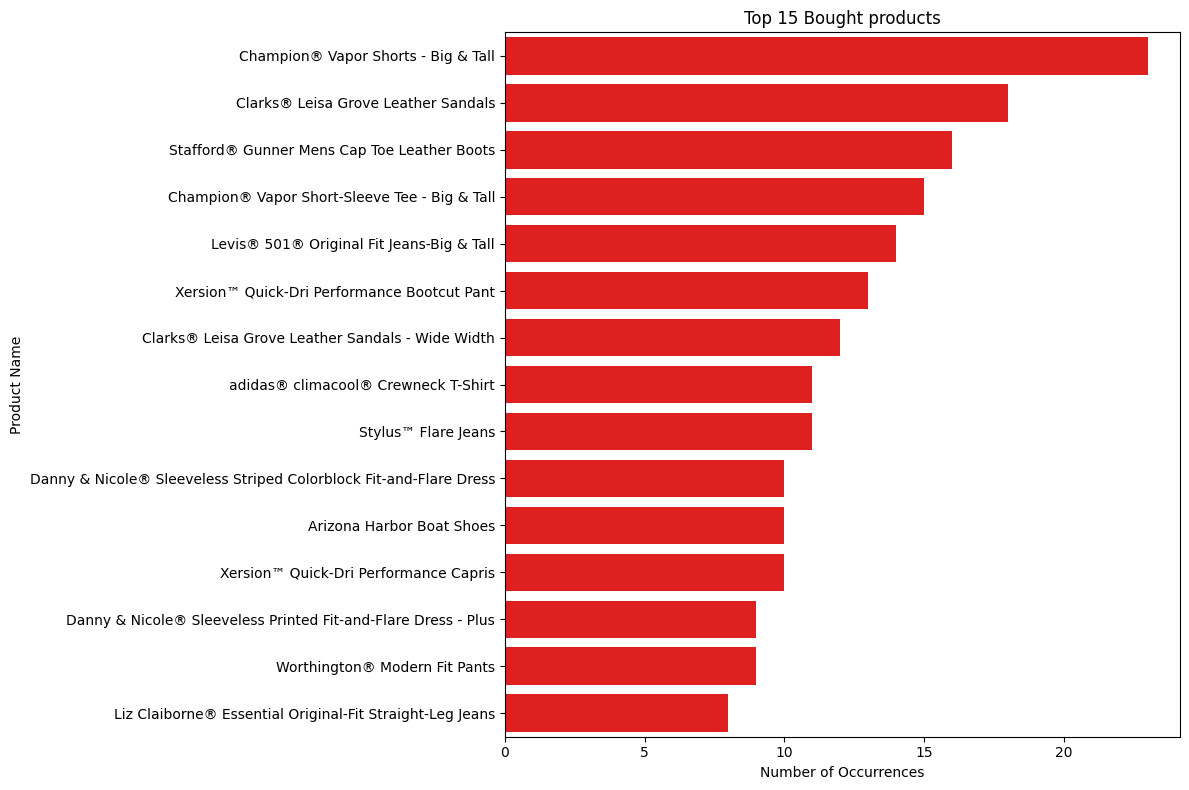

In [ ]:
# Get the top 15 most frequent products in the 'products' DataFrame
top_15_products_counts = products['Name'].value_counts().head(15)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_15_products_counts.values, y=top_15_products_counts.index, color='red')
plt.title('Top 15 Bought products')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

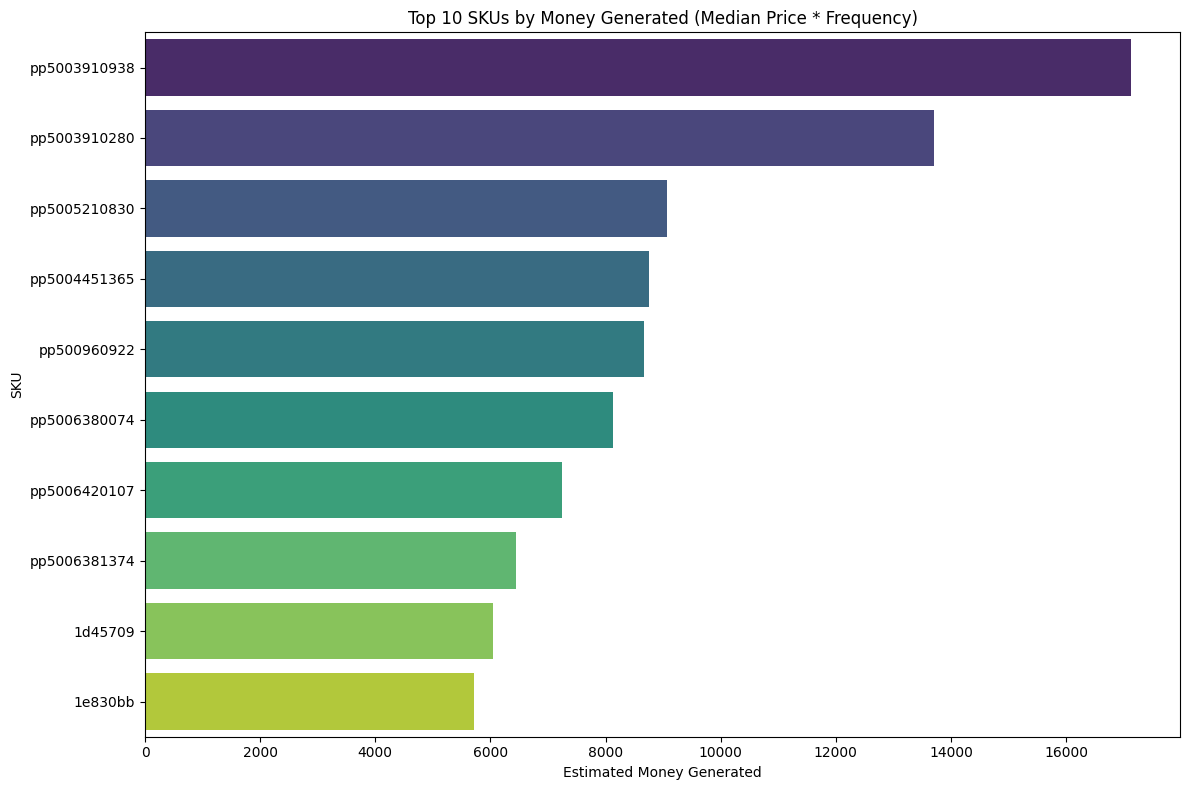

Top 10 SKUs by Estimated Money Generated:
               SKU  Frequency  Median Price  Money Generated
4685  pp5003910938          1     17122.170         17122.17
1602  pp5003910280          1     13699.640         13699.64
4107  pp5005210830          1      9064.690          9064.69
751   pp5004451365          2      4381.240          8762.48
3584   pp500960922          1      8661.790          8661.79
742   pp5006380074          2      4063.595          8127.19
371   pp5006420107          2      3624.670          7249.34
3273  pp5006381374          1      6440.300          6440.30
1358       1d45709          1      6043.100          6043.10
5137       1e830bb          1      5715.040          5715.04


In [ ]:
# 1. Calculate frequency of each SKU
sku_frequency = products['SKU'].value_counts().reset_index()
sku_frequency.columns = ['SKU', 'Frequency']

# 2. Calculate median price for each SKU
sku_median_price = products.groupby('SKU')['Price'].median().reset_index()
sku_median_price.columns = ['SKU', 'Median Price']

# 3. Merge frequency and median price data
sku_performance = pd.merge(sku_frequency, sku_median_price, on='SKU', how='inner')

# 4. Calculate 'Money Generated' (Median Price * Frequency)
sku_performance['Money Generated'] = sku_performance['Frequency'] * sku_performance['Median Price']

# 5. Get the top 10 SKUs by 'Money Generated'
top_10_skus_by_money = sku_performance.sort_values(by='Money Generated', ascending=False).head(10)

# 6. Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Money Generated', y='SKU', data=top_10_skus_by_money, palette='viridis', hue='SKU', legend=False)
plt.title('Top 10 SKUs by Money Generated (Median Price * Frequency)')
plt.xlabel('Estimated Money Generated')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()

print("Top 10 SKUs by Estimated Money Generated:")
print(top_10_skus_by_money)

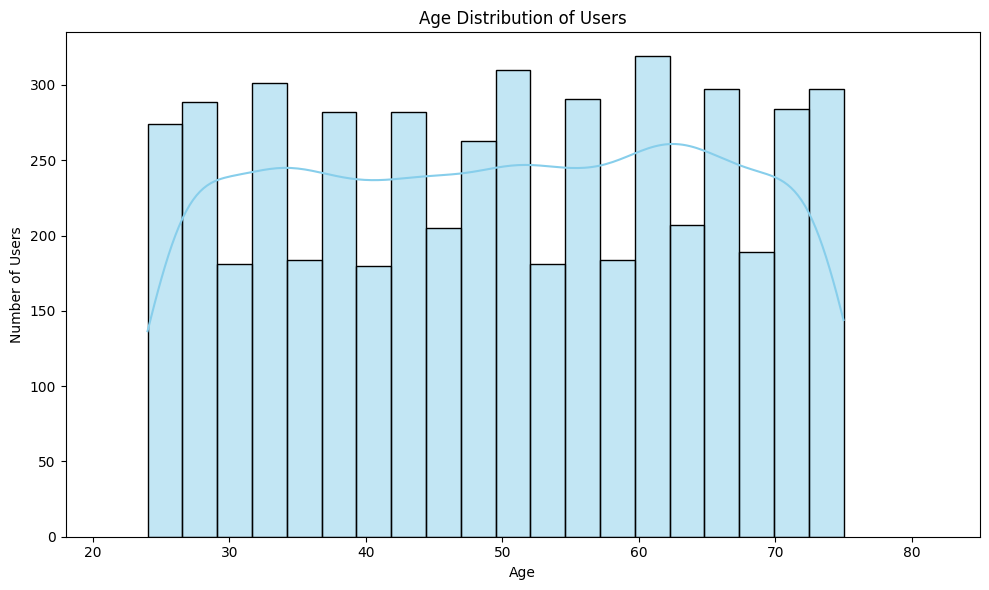

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(users['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.xlim(18, max(users['age'])+10)
plt.tight_layout()
plt.show()

## Creating Age Groups



**Reasoning**:
To categorize users into age groups, I will define appropriate bins and labels, then use `pd.cut()` to create the 'Age_Group' column in the `users` DataFrame. Finally, I will display the head of the DataFrame and the value counts of the new column to verify the categorization.



In [ ]:
bins = [0, 18, 25, 35, 45, 55, 65, users['age'].max() + 5] # +5 to ensure max age is included
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

users['Age_Group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

print("Users DataFrame with Age_Group:\n")
print(users.head())

print("\nAge Group Distribution:\n")
print(users['Age_Group'].value_counts().sort_index())

Users DataFrame with Age_Group:

   Username        DOB          State  age Age_Group
0  bkpn1412 1983-07-31         Oregon   42     36-45
1  gqjs4414 1998-07-27  Massachusetts   27     26-35
2  eehe1434 1950-08-08          Idaho   75       65+
3  hkxj1334 1969-08-03        Florida   56     56-65
4  jjbd1412 2001-07-26        Georgia   24     18-25

Age Group Distribution:

Age_Group
<18         0
18-25      80
26-35     965
36-45     928
46-55     959
56-65    1001
65+      1067
Name: count, dtype: int64


## Merge DataFrames

I will Combine the `users`, `reviews`, and `products` DataFrames to link user age groups with the prices of products they have reviewed.


**Reasoning**:
To link user age groups with product prices, I will first merge the `users` and `reviews` DataFrames on the 'Username' column.



In [ ]:
merged_data = pd.merge(users, reviews, on='Username', how='inner')
merged_data.head()

,Username,DOB,State,age,Age_Group,Uniq_id,Score,Review
0,bkpn1412,1983-07-31,Oregon,42,36-45,2565bf02ec05a59cd1fd78955dda108d,0,Love this heated mattress pad! Ordered the que...
1,bkpn1412,1983-07-31,Oregon,42,36-45,e09b42d19cd350f9762f92d59ecf88ba,2,"I am 511 and a size 6, with a very straight fi..."
2,bkpn1412,1983-07-31,Oregon,42,36-45,cea76118f6a9110a893de2b7654319c0,0,I like the jacket accept it is thin not and th...
3,bkpn1412,1983-07-31,Oregon,42,36-45,bc177e6724df06c676fd526e6d32461d,2,"Soft, comfortable, and it fits nice. Whats not..."
4,bkpn1412,1983-07-31,Oregon,42,36-45,a0d0f5f772021d6320048dc7b61fb551,5,I bought the quick dri bath rug in the size 21...


**Reasoning**:
Now, to fully link user age groups with product prices, I will merge the `merged_data` (containing user and review information) with the `products` DataFrame using the 'Uniq_id' column, as instructed. I will then display the head and info of the resulting DataFrame to verify the merge and inspect its structure.



In [ ]:
merged_data = pd.merge(merged_data, products, on='Uniq_id', how='inner')
print("Merged Data with Products (head):")
print(merged_data.head())

print("\nMerged Data Info:")
merged_data.info()

Merged Data with Products (head):
   Username        DOB   State  age Age_Group  \
0  bkpn1412 1983-07-31  Oregon   42     36-45   
1  bkpn1412 1983-07-31  Oregon   42     36-45   
2  bkpn1412 1983-07-31  Oregon   42     36-45   
3  bkpn1412 1983-07-31  Oregon   42     36-45   
4  bkpn1412 1983-07-31  Oregon   42     36-45   

                            Uniq_id  Score  \
0  2565bf02ec05a59cd1fd78955dda108d      0   
1  e09b42d19cd350f9762f92d59ecf88ba      2   
2  cea76118f6a9110a893de2b7654319c0      0   
3  bc177e6724df06c676fd526e6d32461d      2   
4  a0d0f5f772021d6320048dc7b61fb551      5   

                                              Review           SKU  \
0  Love this heated mattress pad! Ordered the que...  pp5003160034   
1  I am 511 and a size 6, with a very straight fi...  pp5006720496   
2  I like the jacket accept it is thin not and th...  pp5005290257   
3  Soft, comfortable, and it fits nice. Whats not...  pp5006950440   
4  I bought the quick dri bath rug in the si

## Money Generated per Age Group
For each age group, sum the prices of all products reviewed by users within that group to determine the total money generated.


**Reasoning**:
To calculate the total money generated per age group, I will group the 'merged_data' DataFrame by 'Age_Group' and then sum the 'Price' column for each group, storing the result in 'money_generated_by_age_group'.



In [ ]:
money_generated_by_age_group = merged_data.groupby('Age_Group')['Price'].sum().reset_index()
money_generated_by_age_group.columns = ['Age_Group', 'Total_Money_Generated']

print("Total Money Generated by Age Group:")
print(money_generated_by_age_group)

Total Money Generated by Age Group:
  Age_Group  Total_Money_Generated
0       <18                  0.000
1     18-25              74574.595
2     26-35             893589.805
3     36-45             871615.820
4     46-55             882075.470
5     56-65            1004850.685
6       65+            1025830.145


/tmp/ipython-input-4293425119.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  money_generated_by_age_group = merged_data.groupby('Age_Group')['Price'].sum().reset_index()


In [ ]:
money_generated_by_age_group = merged_data.groupby('Age_Group', observed=False)['Price'].sum().reset_index()
money_generated_by_age_group.columns = ['Age_Group', 'Total_Money_Generated']

print("Total Money Generated by Age Group:")
print(money_generated_by_age_group)

Total Money Generated by Age Group:
  Age_Group  Total_Money_Generated
0       <18                  0.000
1     18-25              74574.595
2     26-35             893589.805
3     36-45             871615.820
4     46-55             882075.470
5     56-65            1004850.685
6       65+            1025830.145


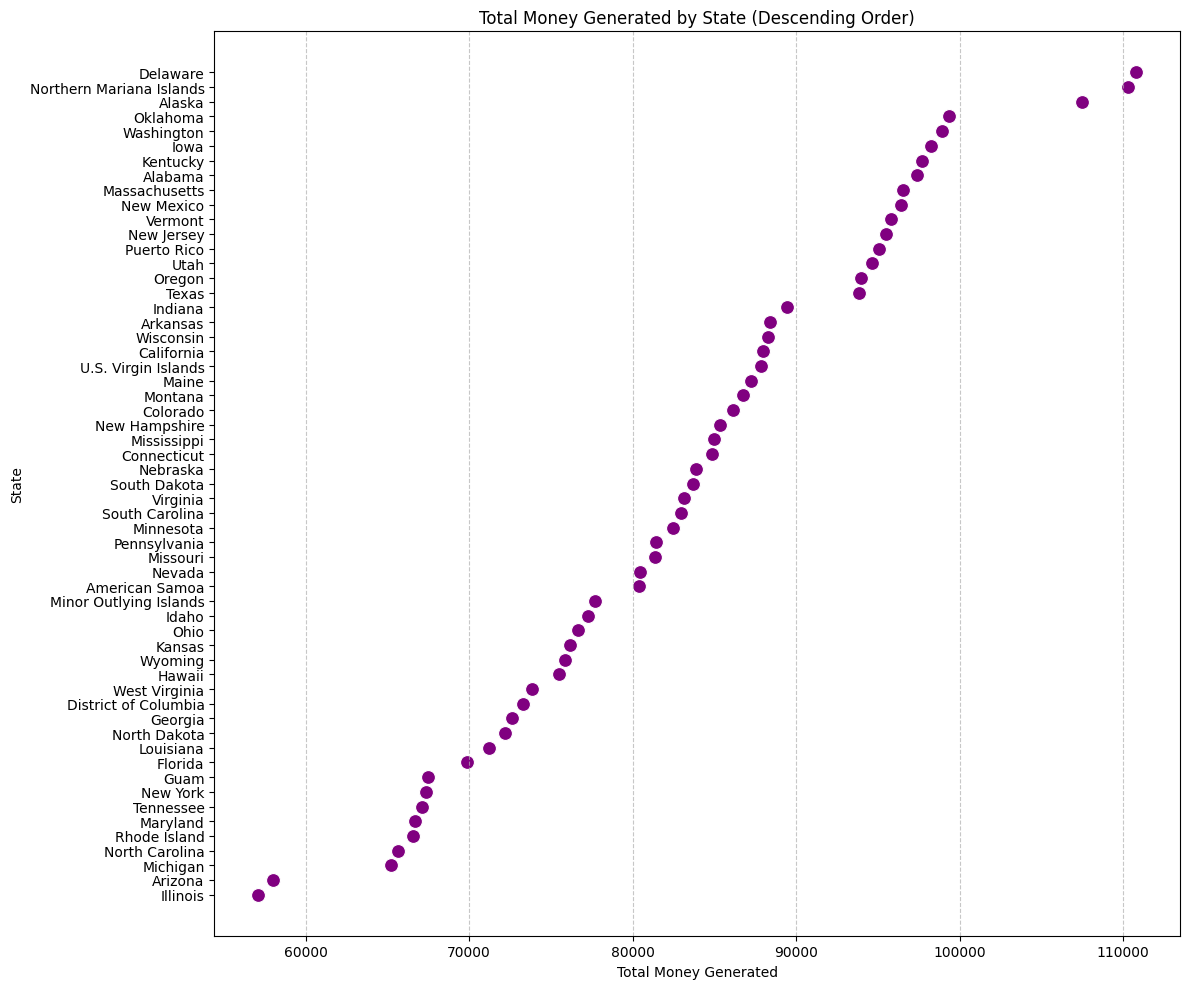

Total Money Generated by State (Descending Order):
                       State  Total_Money_Generated
8                   Delaware             110798.830
38  Northern Mariana Islands             110309.355
1                     Alaska             107468.395
40                  Oklahoma              99343.325
53                Washington              98952.795
17                      Iowa              98261.820
19                  Kentucky              97683.835
0                    Alabama              97394.650
23             Massachusetts              96531.340
34                New Mexico              96415.220


In [ ]:
# Calculate total money generated by each state
money_generated_by_state = merged_data.groupby('State')['Price'].sum().reset_index()
money_generated_by_state.columns = ['State', 'Total_Money_Generated']

# Sort in descending order of money generated
money_generated_by_state = money_generated_by_state.sort_values(by='Total_Money_Generated', ascending=False)

# Create a dot plot
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Total_Money_Generated', y='State', data=money_generated_by_state, s=100, color='purple')
plt.title('Total Money Generated by State (Descending Order)')
plt.xlabel('Total Money Generated')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Total Money Generated by State (Descending Order):")
print(money_generated_by_state.head(10)) # Display top 10 states

## Visualize Total Money Generated by Age Group

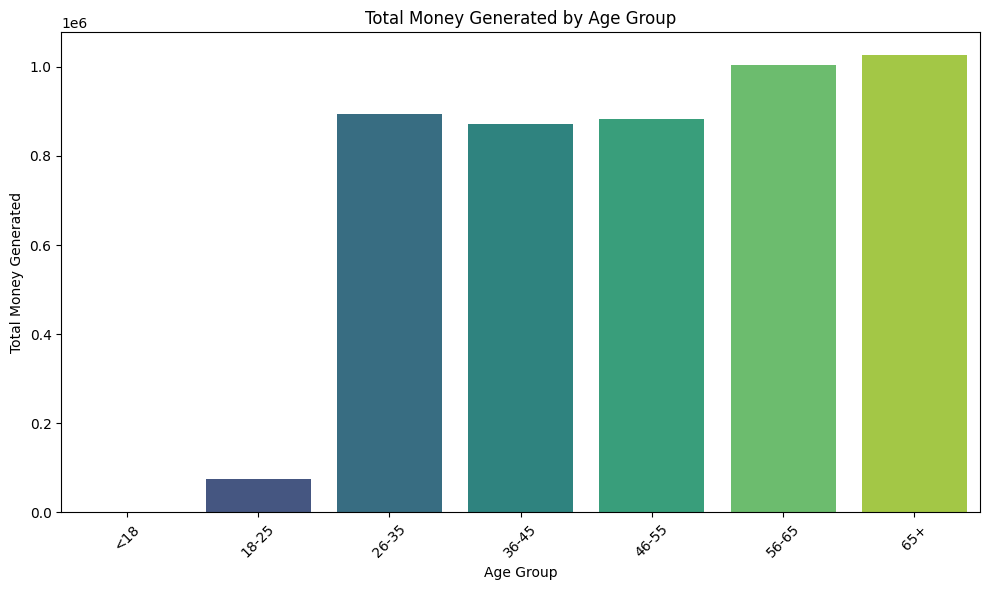

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total_Money_Generated', data=money_generated_by_age_group, palette='viridis', hue='Age_Group', legend=False)
plt.title('Total Money Generated by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Money Generated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
user_features_df = merged_data.groupby('Username').agg(
    Total_Spending=('Price', 'sum'),
    Total_Reviews=('Uniq_id', 'count'),
    Average_Score_Given=('Score', 'mean')
).reset_index()

print("User-level features DataFrame (first 5 rows):")
print(user_features_df.head())

User-level features DataFrame (first 5 rows):
   Username  Total_Spending  Total_Reviews  Average_Score_Given
0  aaez2213          739.87             10             0.900000
1  aage1132          605.77             10             1.300000
2  aagf4423         1482.34              9             0.888889
3  aahc4142          675.01             11             1.000000
4  aajh3423          607.26             10             1.700000


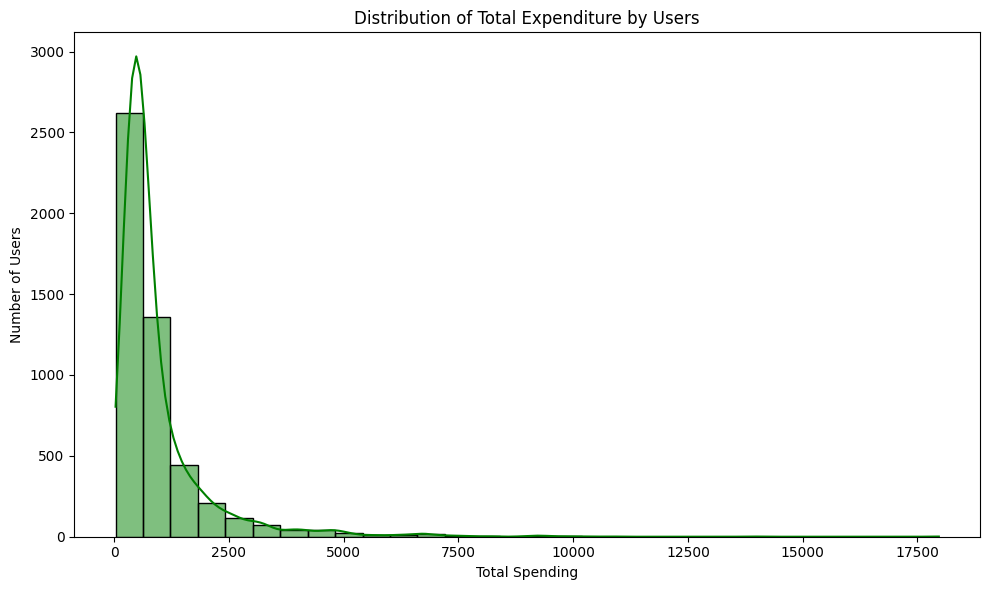

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(user_features_df['Total_Spending'], kde=True, color='green', bins=30)
plt.title('Distribution of Total Expenditure by Users')
plt.xlabel('Total Spending')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()